##### In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

#### Dataset description: 
The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their 
- needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

#### Instructions

- Install the necessary packages
- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Based on the previous data exploration train and test a machine learning classifier
- Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
- Import your ML model into the streamlit application and start making predictions given the provided features values
- Deploy your application on Streamlit share:
- Create a github and a streamlit share accounts
- Create a new git repo
- Upload your local code to the newly created git repo
- log in to your streamlit account an deploy your application from the git repo
 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# import the label Encoder library 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [3]:
df = pd.read_csv("Financial_inclusion_dataset.csv")

In [4]:
df["country"] = label_encoder.fit_transform(df["country"])

In [5]:
df["country"].unique()

array([0, 1, 2, 3])

In [6]:
df["country"].unique()

array([0, 1, 2, 3])

In [7]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,0,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,0,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,0,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,0,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
df.describe(include ="object").T

,count,unique,top,freq
uniqueid,23524,8735,uniqueid_1,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [9]:
df = df.drop("uniqueid", axis=1)
df = df.drop("year", axis=1)

In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

# Optionally, if you want to reset the index after dropping duplicates:
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 19095 non-null  int32 
 1   bank_account            19095 non-null  object
 2   location_type           19095 non-null  object
 3   cellphone_access        19095 non-null  object
 4   household_size          19095 non-null  int64 
 5   age_of_respondent       19095 non-null  int64 
 6   gender_of_respondent    19095 non-null  object
 7   relationship_with_head  19095 non-null  object
 8   marital_status          19095 non-null  object
 9   education_level         19095 non-null  object
 10  job_type                19095 non-null  object
dtypes: int32(1), int64(2), object(8)
memory usage: 1.5+ MB


In [12]:
df["bank_account"] = label_encoder.fit_transform(df["bank_account"])

In [13]:
df = pd.get_dummies(df, drop_first=False)

In [14]:
df

,country,bank_account,household_size,age_of_respondent,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0,1,3,24,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,5,70,True,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0,1,5,26,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,5,34,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,8,26,False,True,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,3,0,4,48,True,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
19091,3,0,2,27,True,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
19092,3,0,5,27,True,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
19093,3,0,7,30,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

Index(['country', 'bank_account', 'household_size', 'age_of_respondent'], dtype='object')

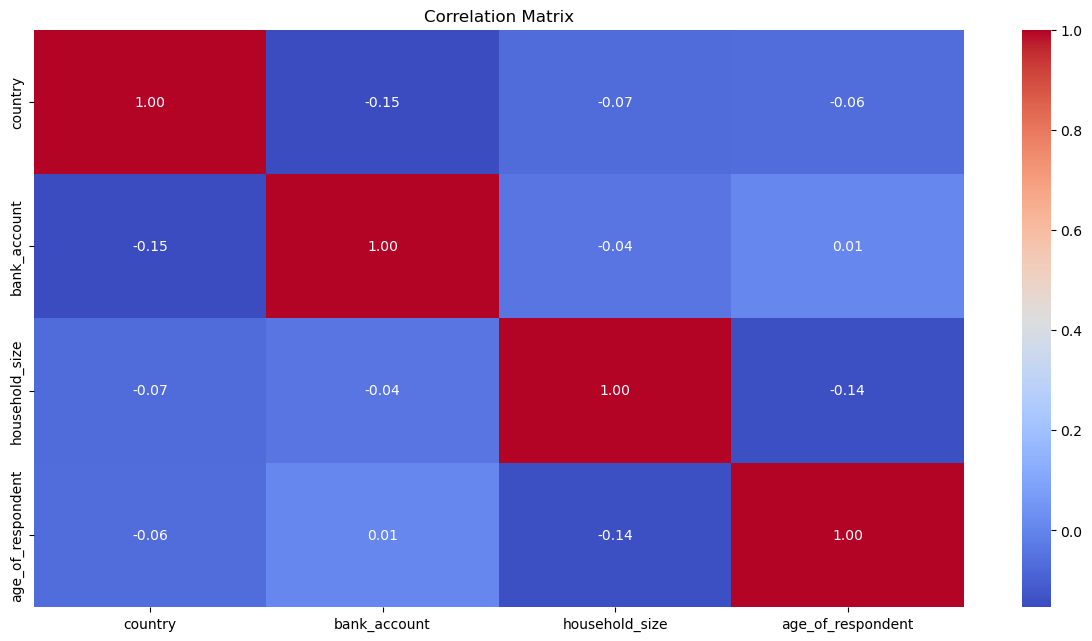

In [16]:
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.to_csv("financial_institution_cleaned.csv")

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = df.drop("bank_account", axis=1), df["bank_account"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SUPPORT VECTOR MACHINE

In [19]:
# Initialize the SVC model
svc_reg = SVC(kernel='rbf')

# Fit the model to the training data
svc_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svc = svc_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Calculate confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Calculate classification report
class_report_svc = classification_report(y_test, y_pred_svc)

# Print the metrics
print(f"Support Vector Classification:")
print(f"Accuracy: {accuracy_svc:.4f}")
print("Confusion Matrix:")
print(conf_matrix_svc)
print("Classification Report:")
print(class_report_svc)

Support Vector Classification:
Accuracy: 0.8733
Confusion Matrix:
[[2347   49]
 [ 314  155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2396
           1       0.76      0.33      0.46       469

    accuracy                           0.87      2865
   macro avg       0.82      0.66      0.69      2865
weighted avg       0.86      0.87      0.85      2865



## GRADIENT BOOSTING CLASSIFIER

In [20]:
gb_clf = GradientBoostingClassifier()

# Fit the model to the training data
gb_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Calculate classification report
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the metrics
print(f"Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)

Gradient Boosting Classifier:
Accuracy: 0.8757
Confusion Matrix:
[[2335   61]
 [ 295  174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2396
           1       0.74      0.37      0.49       469

    accuracy                           0.88      2865
   macro avg       0.81      0.67      0.71      2865
weighted avg       0.86      0.88      0.86      2865



## KNN

In [21]:
# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate classification report
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the metrics
print(f"K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

K-Nearest Neighbors Classifier:
Accuracy: 0.8618
Confusion Matrix:
[[2285  111]
 [ 285  184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2396
           1       0.62      0.39      0.48       469

    accuracy                           0.86      2865
   macro avg       0.76      0.67      0.70      2865
weighted avg       0.85      0.86      0.85      2865



## DECISION TREE CLASSIFIER

In [22]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

# Fit the model to the training data
tree_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tree = tree_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Calculate classification report
class_report_tree = classification_report(y_test, y_pred_tree)

# Print the metrics
print(f"Decision Tree Classifier:")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)

Decision Tree Classifier:
Accuracy: 0.7972
Confusion Matrix:
[[2096  300]
 [ 281  188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2396
           1       0.39      0.40      0.39       469

    accuracy                           0.80      2865
   macro avg       0.63      0.64      0.64      2865
weighted avg       0.80      0.80      0.80      2865



## RANDOM FOREST CLASSIFIER

In [23]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
forest_clf = RandomForestClassifier()

# Fit the model to the training data
forest_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_forest = forest_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Calculate confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Calculate classification report
class_report_forest = classification_report(y_test, y_pred_forest)

# Print the metrics
print(f"Random Forest Classifier:")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Confusion Matrix:")
print(conf_matrix_forest)
print("Classification Report:")
print(class_report_forest)

Random Forest Classifier:
Accuracy: 0.8311
Confusion Matrix:
[[2194  202]
 [ 282  187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2396
           1       0.48      0.40      0.44       469

    accuracy                           0.83      2865
   macro avg       0.68      0.66      0.67      2865
weighted avg       0.82      0.83      0.82      2865



## LOGISTIC REGRESSION

In [24]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log = log_reg.predict(X_test_scaled)

# Predict on the training data (for train evaluation)
y_train_pred_log = log_reg.predict(X_train_scaled)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Calculate confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Calculate classification report
class_report_log = classification_report(y_test, y_pred_log)

# Print the metrics
print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_log:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print("Classification Report:")
print(class_report_log)

Logistic Regression:
Accuracy: 0.8723
Confusion Matrix:
[[2316   80]
 [ 286  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2396
           1       0.70      0.39      0.50       469

    accuracy                           0.87      2865
   macro avg       0.79      0.68      0.71      2865
weighted avg       0.86      0.87      0.86      2865



In [25]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for the features
y_train_preds = xgb.predict(X_train_scaled)
y_test_preds = xgb.predict(X_test_scaled)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_test_preds)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_preds)

# Calculate classification report
class_report_xgb = classification_report(y_test, y_test_preds)

# Print the metrics
print(f"xgboost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)

xgboost:
Accuracy: 0.8513
Confusion Matrix:
[[2368   28]
 [ 398   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2396
           1       0.72      0.15      0.25       469

    accuracy                           0.85      2865
   macro avg       0.79      0.57      0.58      2865
weighted avg       0.83      0.85      0.81      2865



## Randomized Search for Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100],       # Number of boosting stages
    'learning_rate': [0.1, 0.2],     # Shrinks the contribution of each tree
    'max_depth': [3, 4, ],                # Maximum depth of individual trees
    'min_samples_split': [5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4],         # Minimum number of samples required to be at a leaf node
    'subsample': [ 1.0]                # Fraction of samples used for fitting individual base learners
}

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Use the best model
best_gb_clf = grid_search.best_estimator_

# Predict on the test data
y_pred_best_gb = best_gb_clf.predict(X_test_scaled)

# Evaluate performance on test data
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f"Test Accuracy after tuning: {accuracy_best_gb:.4f}")

In [ ]:
list[]

In [26]:
df = pd.read_csv("financial_institution_cleaned.csv")
list(df)

['Unnamed: 0',
 'country',
 'bank_account',
 'household_size',
 'age_of_respondent',
 'location_type_Rural',
 'location_type_Urban',
 'cellphone_access_No',
 'cellphone_access_Yes',
 'gender_of_respondent_Female',
 'gender_of_respondent_Male',
 'relationship_with_head_Child',
 'relationship_with_head_Head of Household',
 'relationship_with_head_Other non-relatives',
 'relationship_with_head_Other relative',
 'relationship_with_head_Parent',
 'relationship_with_head_Spouse',
 'marital_status_Divorced/Seperated',
 'marital_status_Dont know',
 'marital_status_Married/Living together',
 'marital_status_Single/Never Married',
 'marital_status_Widowed',
 'education_level_No formal education',
 'education_level_Other/Dont know/RTA',
 'education_level_Primary education',
 'education_level_Secondary education',
 'education_level_Tertiary education',
 'education_level_Vocational/Specialised training',
 'job_type_Dont Know/Refuse to answer',
 'job_type_Farming and Fishing',
 'job_type_Formally em

In [27]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("CASMIR'S DOCUMENT\financial_institution_cleaned.csv")

df["bank_account"] = df.target
df['bank_account'] = pd.Categorical.from_codes(df.target, df.target_names)

st.title("financial institution classification")
st.write("""
This app uses **Gradient Boosting Classifier** to predict which individuals are most likely to have or use a bank account.
""")

st.write("### Financial dataset", df)

st.sidebar.header('User Input Parameters')

def user_input_features():


    # Slider for Sepal Length
    # Set the label, minimum value, maximum value, and default value (mean) for the slider
    country = st.sidebar.selectbox(
        'Country of Residence',  # Label displayed for the slider
        float(df['country'])
        
    )

    location_type = st.sidebar.selectbox(
        'Location Type',  # Label displayed for the slider
        float(df['location_type'])
        
    )

    cellphone_access = st.sidebar.selectbox(
        'Cellphone Access',  # Label displayed for the slider
        float(df['cellphone_access'])
        
    )

    household_size = st.sidebar.slider(
        'Household Size',  # Label displayed for the slider
        float(df['household_size'].min()),  # Minimum value from the dataset
        float(df['household_size'].max()),  # Maximum value from the dataset
        float(df['household_size'].mean())  # Default value set to the mean of sepal lengths
    )

    age_of_respondent = st.sidebar.slider(
        'Respondent Age',  # Label displayed for the slider
        float(df['age_of_respondent'].min()),  # Minimum value from the dataset
        float(df['age_of_respondent'].max()),  # Maximum value from the dataset
        float(df['age_of_respondent'].mean())  # Default value set to the mean of sepal lengths
    )

    gender_of_respondent = st.sidebar.selectbox(
        'Gender of Respondent',  # Label displayed for the slider
        float(df['gender_of_respondent'])
        
    )

    relationship_with_head = st.sidebar.selectbox(
        'Relationship with Head of Household',  # Label displayed for the slider
        float(df['relationship_with_head'])
        
    )

    marital_status = st.sidebar.selectbox(
        'Marital Status',  # Label displayed for the slider
        float(df['marital_status'])
        
    )

    education_level = st.sidebar.selectbox(
        'Education level',  # Label displayed for the slider
        float(df['education_level'])
        
    )

    job_type = st.sidebar.selectbox(
        'Job Type',  # Label displayed for the slider
        float(df['job_type'])
    )

    data = {'Country of Residence': country,
            'Location Type': location_type,
            'Cellphone Access': cellphone_access,
            'Household Size': household_size,
            'Gender of Respondent': age_of_respondent,
            'Relationship with Head of Household': relationship_with_head,
            'Marital Status': marital_status,
            'Education level': education_level,
            'Job Type': job_type}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

X = pd.DataFrame(df.data, columns=df.feature_names)  # Convert to DataFrame
Y = df.target
gb_clf = GradientBoostingClassifier()
clf.fit(X, Y)

# Make predictions
prediction = gb_clf.predict(input_df)
prediction_proba = gb_clf.predict_proba(input_df)

st.subheader('Prediction')
st.write(df.target_names[prediction])

st.subheader('Prediction Probability')
st.write(prediction_proba)


#### Step 5: Visualizing Results

# You can use Streamlit's `st.line_chart()` or `st.bar_chart()` to show charts or integrate Matplotlib/Plotly for custom visualizations.


# Visualization Example: Show the feature importance
st.subheader('Feature Importance')
import matplotlib.pyplot as plt

importance = gb_clf.feature_importances_
features = df.feature_names
plt.barh(features, importance)
st.pyplot(plt)

''')

SyntaxError: incomplete input (3536726782.py, line 130)

In [14]:
with open("stream_user_financial_classifier.py", "w") as file:
    file.write('''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Downloads/financial_institution_cleaned.csv")

# Assuming 'target' column contains the labels for whether a person has a bank account or not
X = df.drop(columns=['bank_account'])  # Features
Y = df['bank_account']  # Target labels


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
gb_clf = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=100,
    subsample=1.0
)
gb_clf.fit(X_train_scaled, y_train)

# Streamlit app title
st.title("Financial Institution Classification")

# App description
st.write("""
This app uses **Gradient Boosting Classifier** to predict which individuals are most likely to have or use a bank account.
""")

# Display the dataset
st.write("### Financial Dataset Sample", df.head())

# Sidebar for user inputs
st.sidebar.header('User Input Parameters')

def user_input_features():
    country = st.sidebar.selectbox("country", ["country_Kenya", "country_Rwanda", "country_Tanzania", "country_Uganda"])
    location_type = st.sidebar.selectbox("location_type", ["location_type_Rural", "location_type_Urban"])
    cellphone_access = st.sidebar.selectbox('cellphone_access', ['cellphone_access_No', 'cellphone_access_Yes'])
    household_size = st.sidebar.slider('Household Size', int(df['household_size'].min()), int(df['household_size'].max()), int(df['household_size'].mean()))
    age_of_respondent = st.sidebar.slider('Respondent Age', int(df['age_of_respondent'].min()), int(df['age_of_respondent'].max()), int(df['age_of_respondent'].mean()))
    gender_of_respondent = st.sidebar.selectbox("gender_of_respondent", ['gender_of_respondent_Female', 'gender_of_respondent_Male'])
    relationship_with_head = st.sidebar.selectbox('relationship_with_head', ['relationship_with_head_Child', 'relationship_with_head_Head_of_Household', 'relationship_with_head_Other_non_relatives', 'relationship_with_head_Other_relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse'])
    marital_status = st.sidebar.selectbox('marital_status', ['marital_status_Divorced_Seperated', 'marital_status_Dont_know', 'marital_status_Married_Living_together', 'marital_status_Single_Never_Married', 'marital_status_Widowed'])
    education_level = st.sidebar.selectbox('education_level', ['education_level_No_formal_education', 'education_level_Other_Dont_know_RTA', 'education_level_Primary_education', 'education_level_Secondary_education', 'education_level_Tertiary_education', 'education_level_Vocational_Specialised_training'])
    job_type = st.sidebar.selectbox('job_type', ['job_type_Dont_Know_Refuse_to_answer', 'job_type_Farming_and_Fishing', 'job_type_Formally_employed_Government', 'job_type_Formally_employed_Private', 'job_type_Government_Dependent', 'job_type_Informally_employed', 'job_type_No_Income', 'job_type_Other_Income', 'job_type_Remittance_Dependent', 'job_type_Self_employed'])

    data = {
        'country': country,
        'location_type': location_type,
        'cellphone_access': cellphone_access,
        'household_size': household_size,
        'age_of_respondent': age_of_respondent,
        'gender_of_respondent': gender_of_respondent,
        'relationship_with_head': relationship_with_head,
        'marital_status': marital_status,
        'education_level': education_level,
        'job_type': job_type
    }

    # Convert the input data into a DataFrame
    features = pd.DataFrame(data, index=[0])
    
    # Align the features with the training data (adding missing columns if necessary)
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    return features

input_df = user_input_features()

# Make predictions based on user input
prediction = gb_clf.predict(input_df)
prediction_proba = gb_clf.predict_proba(input_df)

# Display the prediction results
st.subheader('Prediction')
st.write(f"Predicted Bank Account Status: {'Has Bank Account' if prediction[0] == 1 else 'No Bank Account'}")

st.subheader('Prediction Probability')
st.write(prediction_proba)

# Feature importance visualization
st.subheader('Feature Importance')
importance = gb_clf.feature_importances_
features = X.columns
plt.barh(features, importance)
st.pyplot(plt)

''')